In [1]:
import pandas as pd
import numpy as np
np.random.seed(1)
from matplotlib import pyplot as plt
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
import itertools
import warnings
warnings.filterwarnings("ignore")

from multiprocessing import cpu_count, Pool


In [2]:
y = pd.read_pickle('../data/target.pkl').target
#y_pred = pd.read_pickle('../data/y_pred.pkl')
y_pred = pd.read_pickle('../data/oof.pkl')

unique_y = np.unique(y)
class_map = dict()
for i,val in enumerate(unique_y):
    class_map[val] = i
        
y_map = np.zeros((y.shape[0],))
y_map = np.array([class_map[val] for val in y])

In [3]:
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [4]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_map, np.argmax(y_pred.values, axis=-1))
np.set_printoptions(precision=2)

In [5]:
class_names = ['class_6',
 'class_15',
 'class_16',
 'class_42',
 'class_52',
 'class_53',
 'class_62',
 'class_64',
 'class_65',
 'class_67',
 'class_88',
 'class_90',
 'class_92',
 'class_95']

Normalized confusion matrix
[[9.34e-01 0.00e+00 1.99e-02 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
  4.64e-02 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 7.86e-01 0.00e+00 6.87e-02 0.00e+00 0.00e+00 1.21e-02 4.04e-03
  0.00e+00 0.00e+00 2.02e-03 1.27e-01 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 9.96e-01 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
  4.33e-03 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 2.10e-02 0.00e+00 7.57e-01 1.68e-03 0.00e+00 5.53e-02 2.51e-03
  0.00e+00 1.68e-03 0.00e+00 1.58e-01 0.00e+00 2.51e-03]
 [0.00e+00 5.46e-03 0.00e+00 2.30e-01 1.80e-01 0.00e+00 4.37e-02 0.00e+00
  0.00e+00 1.64e-02 0.00e+00 5.25e-01 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00
  0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00 2.48e-01 1.24e-02 0.00e+00 5.68e-01 2.27e-02
  0.00e+00 2.48e-02 0.00e+00 1.24e-01 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00 6.86e-02 0.00e+00 0.00e+00

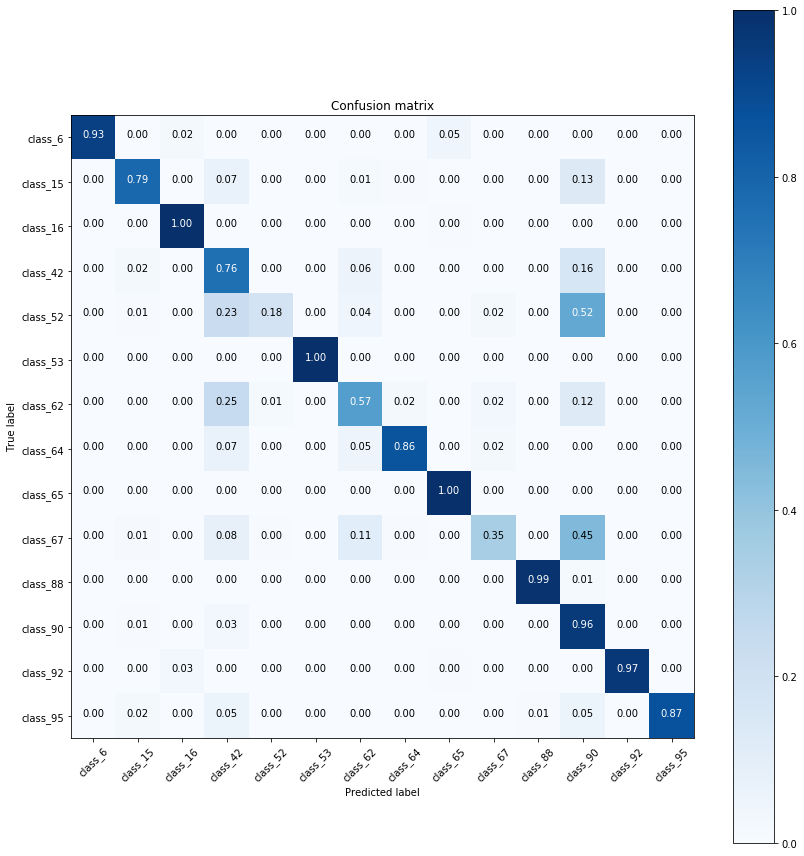

In [6]:
# Plot non-normalized confusion matrix
plt.figure(figsize=(12,12))
foo = plot_confusion_matrix(cnf_matrix, classes=class_names,normalize=True,
                      title='Confusion matrix')